In [15]:
import os
from secret_key import openapi_key

In [16]:
os.environ['OPENAI_API_KEY'] = openapi_key

In [17]:
from langchain_community.llms import OpenAI

llm = OpenAI(temperature=0.6)
name = llm.invoke("I want to open a restaurant for Italian food. Suggest a fancy name for this.")
print(name)



"La Bella Cucina" (The Beautiful Kitchen)


In [18]:
# prompt template
# dynamic 
from langchain_core.prompts import PromptTemplate

prompt_template_name = PromptTemplate(
    input_variables = ['cuisine'],
    template = 'I want to open a restaurant for {cuisine} food. Suggest a fancy name for this.'
)

prompt_template_name.format(cuisine='Indian')




'I want to open a restaurant for Indian food. Suggest a fancy name for this.'

In [23]:
from langchain_core.output_parsers import StrOutputParser

parser = StrOutputParser()

# chain - runnable pipeline
chain = prompt_template_name | llm | parser

# run
print(chain.invoke({"cuisine": "Indian"}))



"Maharaja's Palace" 


In [24]:
# here instead of PromptTemplate, ChatPromptTemplate & instead of OpenAI, ChatOpenAI for future proofing and risk of deprecation
print(chain.invoke({"cuisine": "Mexican"}))



"Casa de Sabor" (House of Flavor)


## Sequential chain

#### SimpleSequentialChain

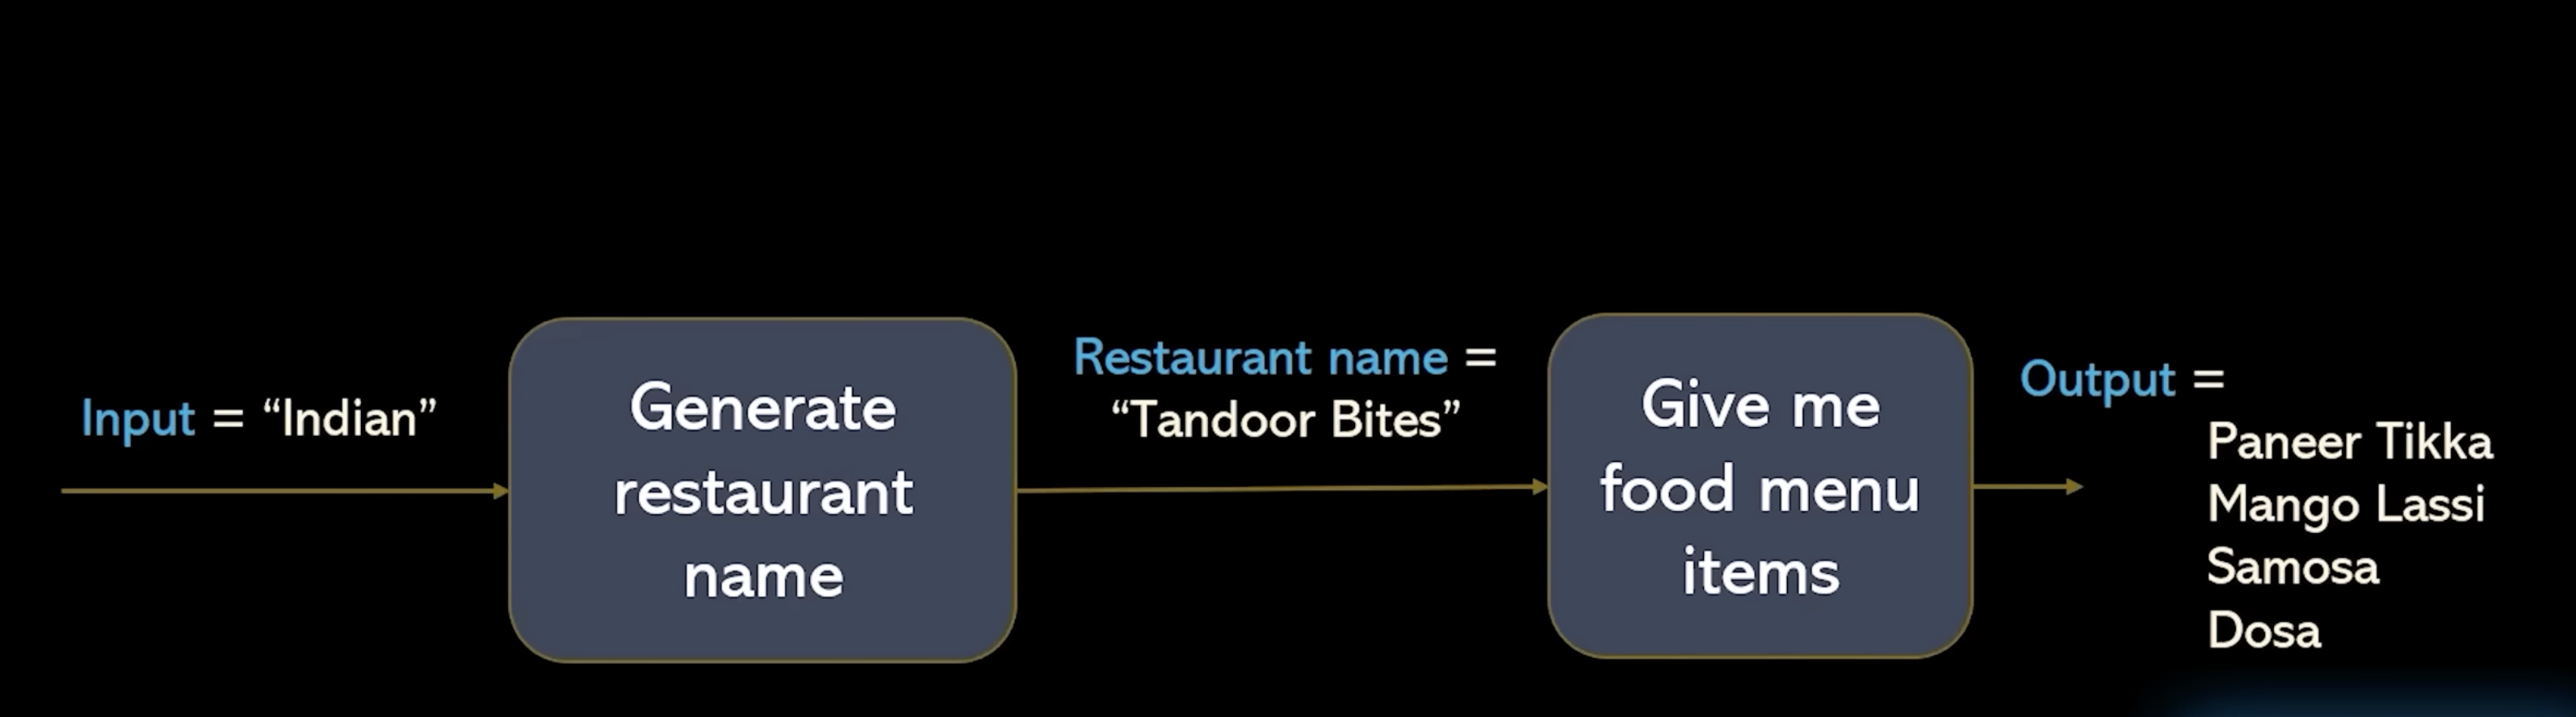